<a href="https://colab.research.google.com/github/ErickOlivetto/bootcamp-data-science-aplicada/blob/main/Modulo1_Saude/Bootcamp_Dados_Aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [8]:
dados = pd.read_csv("https://github.com/ErickOlivetto/bootcamp-data-science-aplicada/raw/main/Dados/A120703189_28_143_208.csv", encoding='ISO-8859-1', skiprows=3, sep = ';', skipfooter=12, thousands='.', decimal=',', engine='python')

In [9]:
usaveis = dados.mean().index.tolist()
usaveis.insert(0, 'Unidade da Federação')
dados_usaveis = dados[usaveis]
dados_usaveis = dados_usaveis.set_index('Unidade da Federação')
dados_usaveis = dados_usaveis.drop('Total', axis=1)
dados_usaveis['Total'] = dados_usaveis.sum(axis=1)
ordenados_total = dados_usaveis.sort_values('Total', ascending = False)
ordenados_total = ordenados_total.drop('Total', axis = 1)
colunas_interesse = ordenados_total.columns[6:]
ordenados_total = ordenados_total[colunas_interesse]
regioes = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul', '5':'Centro-Oeste'}
ordenados_total['Região'] = [regioes[dado[0]] for dado in ordenados_total.index]

# Aula 5

In [10]:
ultimo_mes_apurado = ordenados_total.columns[-2]
ultimo_mes_apurado

'2021/Mar'

In [11]:
ordenados_total[ultimo_mes_apurado]

Unidade da Federação
35 São Paulo             177408317.71
31 Minas Gerais           79780838.00
41 Paraná                 43480729.07
43 Rio Grande do Sul      37798832.80
33 Rio de Janeiro         49149884.48
29 Bahia                  31314602.44
26 Pernambuco             39472738.81
42 Santa Catarina         19375822.56
23 Ceará                  17173151.55
52 Goiás                  24867001.02
15 Pará                   13069564.31
21 Maranhão               17294509.11
32 Espírito Santo         15606368.11
24 Rio Grande do Norte     8733455.36
25 Paraíba                12517894.05
53 Distrito Federal       14731938.43
50 Mato Grosso do Sul      4035989.77
22 Piauí                   9542151.53
27 Alagoas                 8180887.21
51 Mato Grosso             8835890.09
13 Amazonas                6799060.80
28 Sergipe                 3081081.42
17 Tocantins                928756.84
11 Rondônia                4732441.04
12 Acre                    1137341.65
14 Roraima                 23

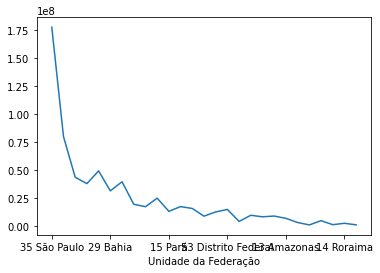

In [12]:
ordenados_total[ultimo_mes_apurado].plot()

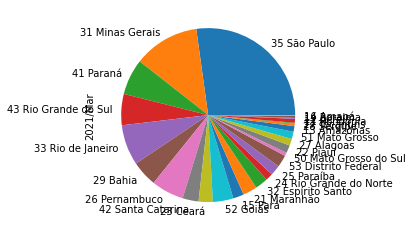

In [13]:
ordenados_total[ultimo_mes_apurado].plot(kind = 'pie')

Pontos negativos no grafico anterior:
- Legenda inviável
- Número de fatias muito elevado

Ponto que salva:
- Gráfico está ordenado

Porém...

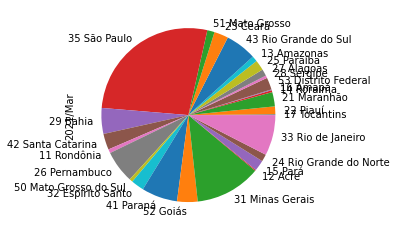

In [14]:
ordenados_total[ultimo_mes_apurado].sample(frac=1).plot(kind = 'pie')

Pontos negativos no gráfico anterior?
- Além dos anteriores, fica difícil identificar a ordem
- Cores repetidas
- Não deixa a informação clara

In [15]:
ordenados_total[ultimo_mes_apurado] / ordenados_total[ultimo_mes_apurado].loc['33 Rio de Janeiro']

Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.62
41 Paraná                0.88
43 Rio Grande do Sul     0.77
33 Rio de Janeiro        1.00
29 Bahia                 0.64
26 Pernambuco            0.80
42 Santa Catarina        0.39
23 Ceará                 0.35
52 Goiás                 0.51
15 Pará                  0.27
21 Maranhão              0.35
32 Espírito Santo        0.32
24 Rio Grande do Norte   0.18
25 Paraíba               0.25
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.08
22 Piauí                 0.19
27 Alagoas               0.17
51 Mato Grosso           0.18
13 Amazonas              0.14
28 Sergipe               0.06
17 Tocantins             0.02
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

In [16]:
(ordenados_total[ultimo_mes_apurado] / ordenados_total[ultimo_mes_apurado].loc['33 Rio de Janeiro']).head()

Unidade da Federação
35 São Paulo           3.61
31 Minas Gerais        1.62
41 Paraná              0.88
43 Rio Grande do Sul   0.77
33 Rio de Janeiro      1.00
Name: 2021/Mar, dtype: float64

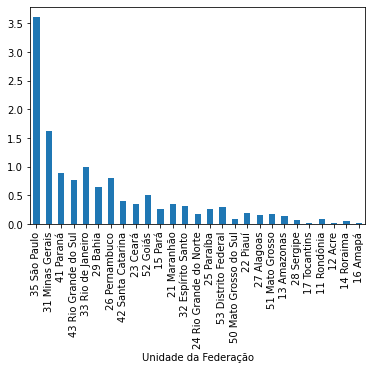

In [17]:
(ordenados_total[ultimo_mes_apurado] / ordenados_total[ultimo_mes_apurado].loc['33 Rio de Janeiro']).plot(kind = 'bar')

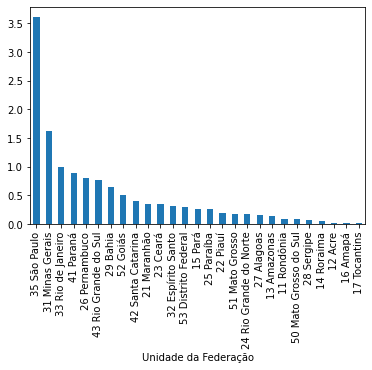

In [18]:
(ordenados_total[ultimo_mes_apurado].sort_values(ascending = False) / ordenados_total[ultimo_mes_apurado].loc['33 Rio de Janeiro']).plot(kind = 'bar')

## Desafio: Buscar na drocumentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

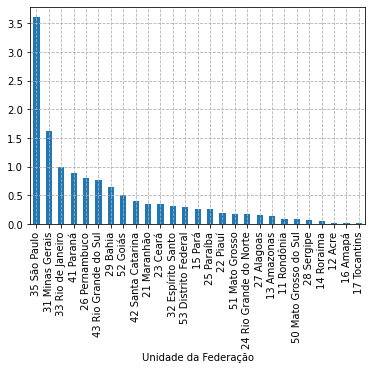

In [19]:
ax = (ordenados_total[ultimo_mes_apurado].sort_values(ascending = False) / ordenados_total[ultimo_mes_apurado].loc['33 Rio de Janeiro']).plot(kind = 'bar')
ax.grid(linestyle = 'dashed')
plt.show()

## Desafio: Fazer um gráfico e uma tabela de gastos dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [20]:
ordenados_total[ultimo_mes_apurado] / ordenados_total[ultimo_mes_apurado].loc['35 São Paulo']

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.45
41 Paraná                0.25
43 Rio Grande do Sul     0.21
33 Rio de Janeiro        0.28
29 Bahia                 0.18
26 Pernambuco            0.22
42 Santa Catarina        0.11
23 Ceará                 0.10
52 Goiás                 0.14
15 Pará                  0.07
21 Maranhão              0.10
32 Espírito Santo        0.09
24 Rio Grande do Norte   0.05
25 Paraíba               0.07
53 Distrito Federal      0.08
50 Mato Grosso do Sul    0.02
22 Piauí                 0.05
27 Alagoas               0.05
51 Mato Grosso           0.05
13 Amazonas              0.04
28 Sergipe               0.02
17 Tocantins             0.01
11 Rondônia              0.03
12 Acre                  0.01
14 Roraima               0.01
16 Amapá                 0.01
Name: 2021/Mar, dtype: float64

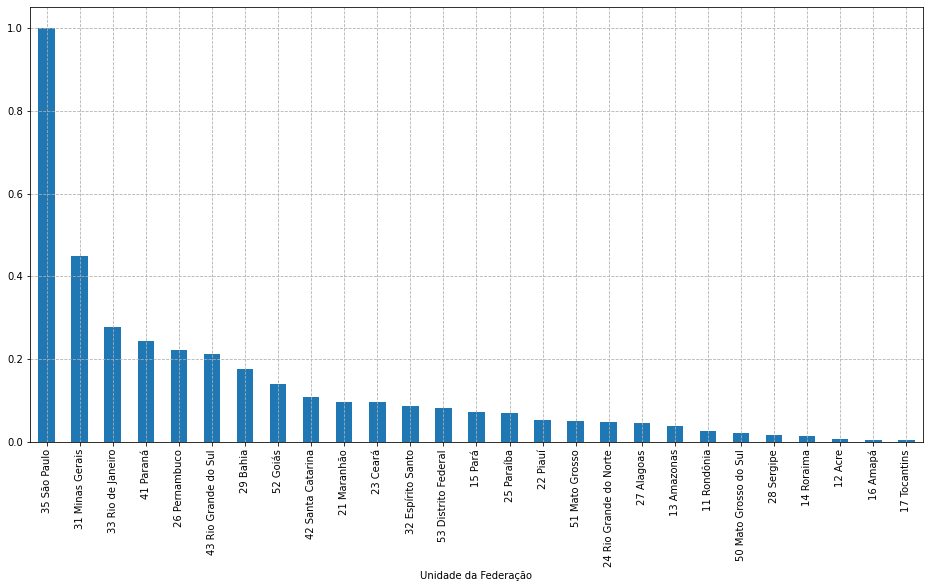

In [21]:
ax = (ordenados_total[ultimo_mes_apurado].sort_values(ascending = False) / ordenados_total[ultimo_mes_apurado].loc['35 São Paulo']).plot(kind = 'bar', figsize = (16,8))
ax.grid(linestyle = 'dashed')
plt.show()

## Desafio: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

In [22]:
Pop_Sao_Paulo = 46289333 # Fonte IBGE 46.289.333
Pop_Rio_de_Janeiro = 17366189 # Fonte IBGE 17.366.189

In [23]:
# Valor foi multiplicado por 1.000.000 devido ao df ter sido dividido por esse valor anteriormente, dessa forma o resultado saindo em Reais
print(f'{(ordenados_total[ultimo_mes_apurado].loc["35 São Paulo"]*1000000/Pop_Sao_Paulo):0.3f} Reais por Habitante - Para São Paulo')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["33 Rio de Janeiro"]*1000000/Pop_Rio_de_Janeiro):0.3f} Reais por Habitante - Para Rio de Janeiro')

3832596.113 Reais por Habitante - Para São Paulo
2830205.549 Reais por Habitante - Para Rio de Janeiro


In [24]:
Pop_Espirito_Santo = 4064052 # Fonte IBGE 4.064.052
Pop_Minas_Gerais = 21292666 # Fonte IBGE 21.292.666

In [25]:
print(f'{(ordenados_total[ultimo_mes_apurado].loc["35 São Paulo"]*1000000/Pop_Sao_Paulo):0.3f} Reais por Habitante - Para São Paulo, 1º em gasto total')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["31 Minas Gerais"]*1000000/Pop_Minas_Gerais):0.3f} Reais por Habitante - Para Minas Gerais, 2º em gasto total')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["33 Rio de Janeiro"]*1000000/Pop_Rio_de_Janeiro):0.3f} Reais por Habitante - Para Rio de Janeiro, 3º em gasto total')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["32 Espírito Santo"]*1000000/Pop_Espirito_Santo):0.3f} Reais por Habitante - Para Espirito Santo, 12º em gasto total')

3832596.113 Reais por Habitante - Para São Paulo, 1º em gasto total
3746869.368 Reais por Habitante - Para Minas Gerais, 2º em gasto total
2830205.549 Reais por Habitante - Para Rio de Janeiro, 3º em gasto total
3840100.498 Reais por Habitante - Para Espirito Santo, 12º em gasto total


## Desafio: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

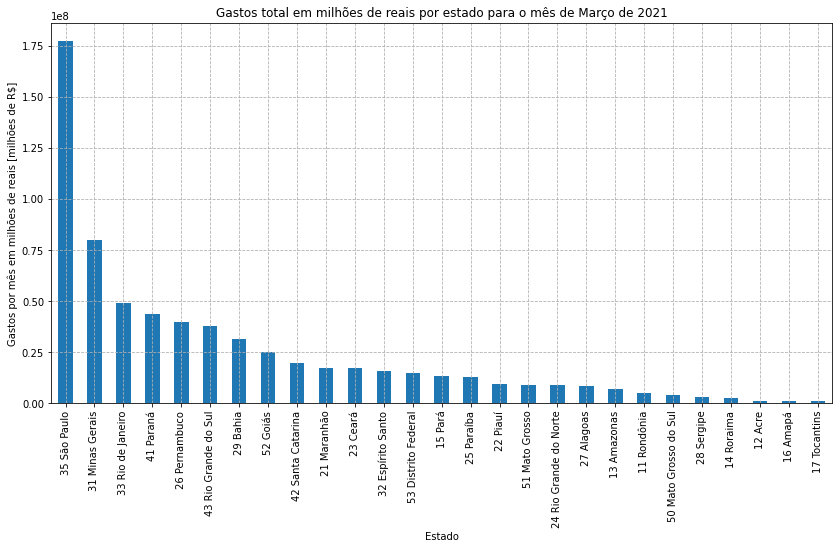

3832596.113 Reais por Habitante - Para São Paulo, 1º em gasto total
3746869.368 Reais por Habitante - Para Minas Gerais, 2º em gasto total
2830205.549 Reais por Habitante - Para Rio de Janeiro, 3º em gasto total
3840100.498 Reais por Habitante - Para Espirito Santo, 12º em gasto total


In [26]:
#Trazendo os resultados para facilitar a análise

ax = (ordenados_total[ultimo_mes_apurado].sort_values(ascending = False).plot(kind = 'bar', figsize = (14,7)))
ax.grid(linestyle = 'dashed')
ax.set_title('Gastos total em milhões de reais por estado para o mês de Março de 2021')
ax.set_xlabel('Estado')
ax.set_ylabel('Gastos por mês em milhões de reais [milhões de R$]')
plt.show()

print(f'{(ordenados_total[ultimo_mes_apurado].loc["35 São Paulo"]*1000000/Pop_Sao_Paulo):0.3f} Reais por Habitante - Para São Paulo, 1º em gasto total')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["31 Minas Gerais"]*1000000/Pop_Minas_Gerais):0.3f} Reais por Habitante - Para Minas Gerais, 2º em gasto total')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["33 Rio de Janeiro"]*1000000/Pop_Rio_de_Janeiro):0.3f} Reais por Habitante - Para Rio de Janeiro, 3º em gasto total')
print(f'{(ordenados_total[ultimo_mes_apurado].loc["32 Espírito Santo"]*1000000/Pop_Espirito_Santo):0.3f} Reais por Habitante - Para Espirito Santo, 12º em gasto total')

Através do gráfico, é possível notar uma grande diferença entre os gastos de cada estado, com valores que chegam a ser mais do que o dobro, triplo ou muito mais superior aos demais. Entretando, levando em consideração que o gasto total em regiões mais populosa apresentaria, com um mesmo custo por habitante, um valor total mais elevado, optou-se por analisar os mesmo gastos, porém por habitante, para comparação, foram utilizados os dados da região sudeste, que ocupa os três primeiros lugares no gráfico de gastos totais.
Analisando agora os dados dos gastos, em reais, por habitante do estado, é possível observar que apesar do estado de São Paulo se destacar com preços ligeiramente superior ao dobro de Minas Gerais quando colocado em perspectiva do valor por habitante o valor é próximo, esse padrão também pode ser obsrvado para o estado do Espirito Santo que, apesar de aprensentar um valor total muito inferior ao do estado de São Paulo, seu gasto por habitante é ligeiramente maior. Por outro lado, para o estado do Rio de Janeiro, podemos observar um valor por habitante infeior a todos os outros estados da região.

Uma hipótese que pode ser levantada a respeito do preço nos estados está ligada não diretamente ao número de habitantes no estado porém ao número e ao tempo de internações, dessa forma, apesar do estado do Rio de Janeiro ter uma populção superior ao estado do Espírito Santo, o número e tempo de internação pode ser inferior no estado do Rio de Janeiro. 